In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
%matplotlib inline

In [9]:
consumer_complaints = pd.read_csv('complaints_dec_2014.csv')

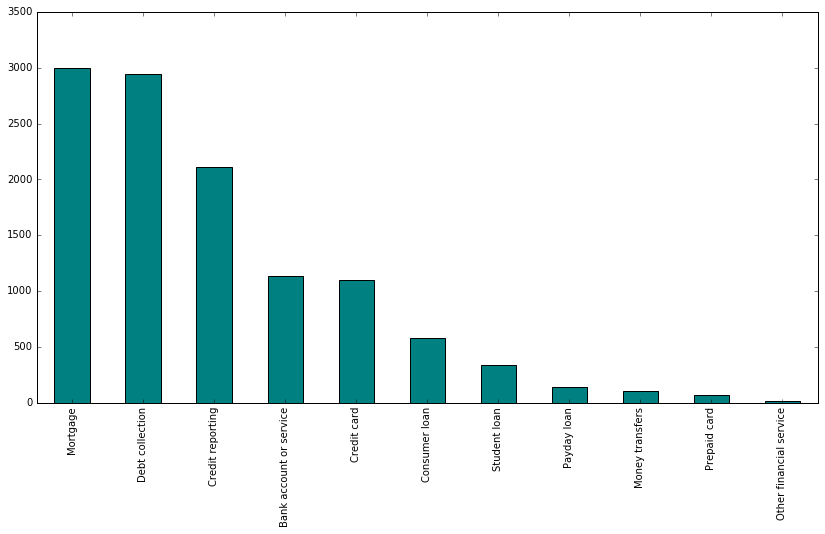

In [206]:
complaints_by_product = consumer_complaints['Product'].value_counts()
complaints_by_product.plot(kind='bar', figsize=(14, 7), color='teal')

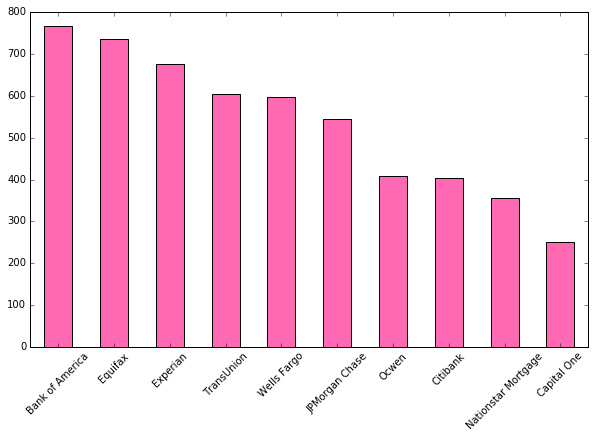

In [186]:
complaints_by_top_companies = consumer_complaints['Company'].value_counts()[:10]
complaints_by_top_companies.plot(kind='bar', rot=45, figsize=(10, 6), color='hotpink')

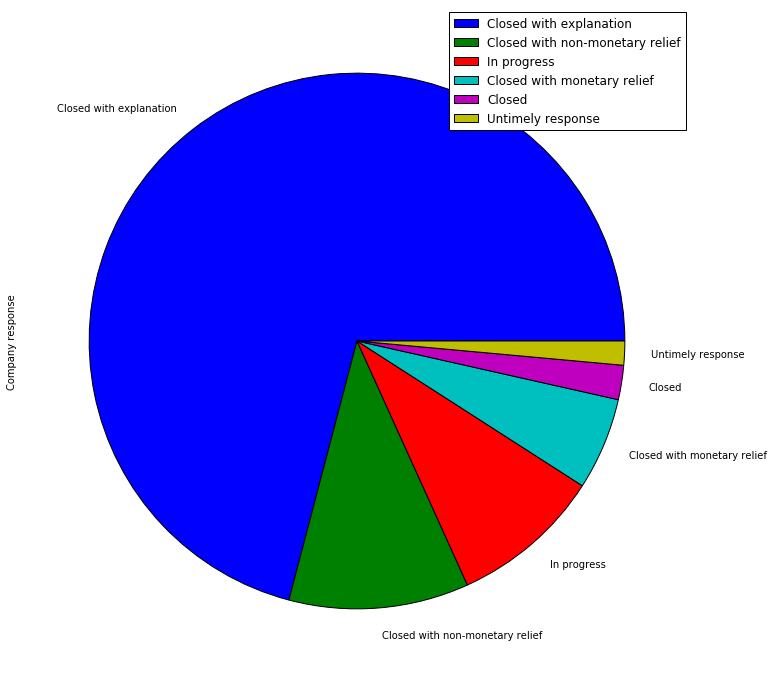

In [197]:
complaints_by_response = consumer_complaints['Company response'].value_counts()
complaints_by_response.plot(kind='pie', figsize=(12, 12), legend=True)

In [19]:
date_sent = consumer_complaints.pop('Date sent to company')

In [23]:
consumer_complaints.index = pd.to_datetime(date_sent, format='%m/%d/%Y')

In [27]:
consumer_complaints['Day of Week Sent'] = consumer_complaints.index.dayofweek

In [102]:
consumer_complaints['Day of Week Sent'].value_counts()

0    2609
2    2540
1    2450
4    1742
3    1449
5     429
6     324
Name: Day of Week Sent, dtype: int64

In [162]:
test = []
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for item, day in zip(range(7), days):
    x = consumer_complaints[consumer_complaints['Day of Week Sent'] == item].index.value_counts()
    test.append((day, sum(x)/len(x)))
print(test)

[('Monday', 326.125), ('Tuesday', 306.25), ('Wednesday', 317.5), ('Thursday', 181.125), ('Friday', 217.75), ('Saturday', 85.799999999999997), ('Sunday', 81.0)]


In [163]:
complaints_by_day_of_week = pd.DataFrame(test)

In [164]:
cbd = complaints_by_day_of_week.set_index(0)
cbd

,1
0,
Monday,326.125
Tuesday,306.250
Wednesday,317.500
Thursday,181.125
Friday,217.750
Saturday,85.800
Sunday,81.000


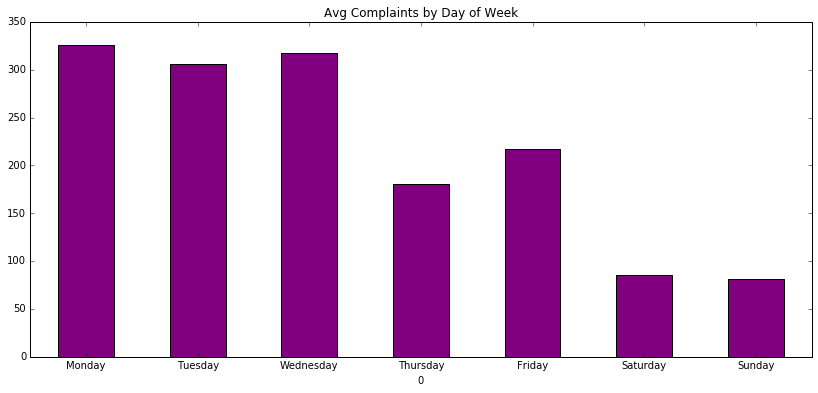

In [213]:
cbd.plot(kind='bar', title='Avg Complaints by Day of Week', color='purple', legend=False, rot=0, figsize=(14, 6))